<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/7-3%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EB%AA%A8%EB%8D%B8%20%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 모델 훈련

## 손실 곡선

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()
train_scaled = train_input / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
model = Sequential(name = 'loss_test')
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [4]:
model.summary()

Model: "loss_test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [6]:
history = model.fit(train_scaled, train_target, batch_size=100, epochs=10)

Epoch 1/10
480/480 [==============================] - 6s 3ms/step - loss: 0.5818 - accuracy: 0.8010
Epoch 2/10
480/480 [==============================] - 2s 3ms/step - loss: 0.4177 - accuracy: 0.8532
Epoch 3/10
480/480 [==============================] - 2s 3ms/step - loss: 0.3807 - accuracy: 0.8646
Epoch 4/10
480/480 [==============================] - 2s 3ms/step - loss: 0.3530 - accuracy: 0.8743
Epoch 5/10
480/480 [==============================] - 2s 3ms/step - loss: 0.3329 - accuracy: 0.8810
Epoch 6/10
480/480 [==============================] - 2s 3ms/step - loss: 0.3206 - accuracy: 0.8841
Epoch 7/10
480/480 [==============================] - 2s 3ms/step - loss: 0.3063 - accuracy: 0.8887
Epoch 8/10
480/480 [==============================] - 2s 3ms/step - loss: 0.2956 - accuracy: 0.8929
Epoch 9/10
480/480 [==============================] - 2s 3ms/step - loss: 0.2846 - accuracy: 0.8964
Epoch 10/10
480/480 [==============================] - 2s 3ms/step - loss: 0.2761 - accuracy: 0.9003

In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

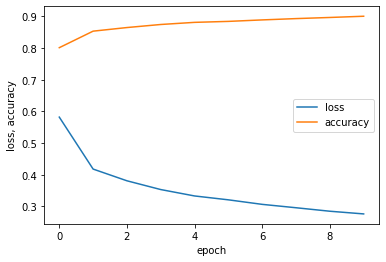

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['loss', 'accuracy'], loc=5)

In [9]:
def model_fn(a_layer=None):
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(Dense(10, activation='softmax'))

  return model

In [10]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

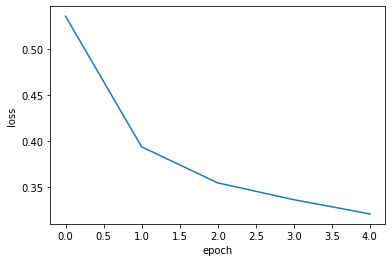

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

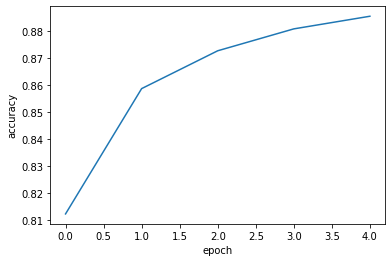

In [13]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [14]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

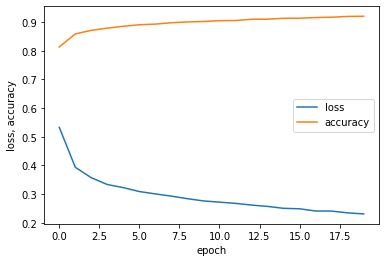

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['loss', 'accuracy'], loc=5)

## 검증 손실

In [16]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') # optimizer default = RMSPrep
history = model.fit(train_scaled, train_target, 
                    validation_data = [val_scaled, val_target],
                    epochs=20, verbose=1)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5278 - accuracy: 0.8136 - val_loss: 0.4709 - val_accuracy: 0.8293
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3901 - accuracy: 0.8593 - val_loss: 0.3782 - val_accuracy: 0.8639
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3534 - accuracy: 0.8727 - val_loss: 0.3646 - val_accuracy: 0.8712
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3335 - accuracy: 0.8809 - val_loss: 0.3552 - val_accuracy: 0.8761
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3186 - accuracy: 0.8858 - val_loss: 0.4189 - val_accuracy: 0.8572
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3092 - accuracy: 0.8904 - val_loss: 0.3722 - val_accuracy: 0.8773
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2988 - accuracy: 0.8941 - val_loss: 0.3481 - val_accuracy:

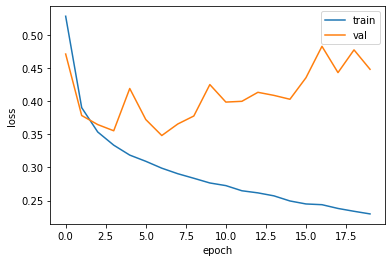

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [18]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

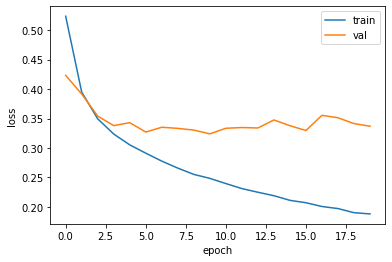

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [20]:
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()
train_scaled = train_input / 255
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_split=0.2)  # validation_split 사용

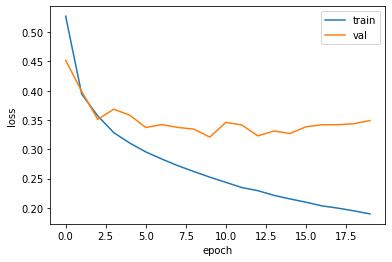

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

## 드롭아웃

### [model 구성 전체 설명](https://medium.com/analytics-vidhya/tensorflow-2-0-save-and-restore-models-4708ed3f0d8)

In [22]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [23]:
model = model_fn(Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

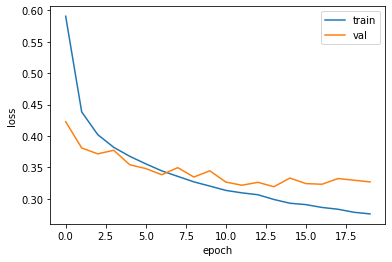

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [26]:
model = model_fn(Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

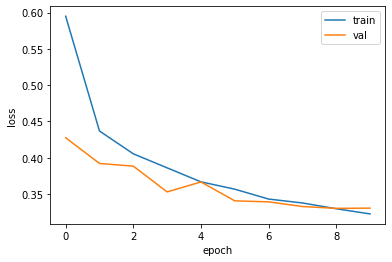

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [28]:
model.save_weights('model_weights.h5') # 가중치만 저장

In [29]:
model.save('model_whole.h5') # model, compile 등 전체 저장

In [30]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Mar  5 13:18 model_weights.h5
-rw-r--r-- 1 root root 982664 Mar  5 13:18 model_whole.h5


In [31]:
model = model_fn(Dropout(0.3))
model.load_weights('model_weights.h5')

In [32]:
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.88275


In [33]:
model = keras.models.load_model('model_whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3306 - accuracy: 0.8827


[0.33064204454421997, 0.8827499747276306]

## 콜백

### ModelCheckpoint 

In [34]:
model = model_fn(Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

In [35]:
checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True)

In [36]:
model.fit(train_scaled, train_target,
          epochs=20, verbose=1,
          validation_data = (val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5852 - accuracy: 0.7938 - val_loss: 0.4499 - val_accuracy: 0.8364
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4357 - accuracy: 0.8418 - val_loss: 0.3895 - val_accuracy: 0.8568
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4018 - accuracy: 0.8533 - val_loss: 0.3618 - val_accuracy: 0.8643
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3818 - accuracy: 0.8612 - val_loss: 0.3581 - val_accuracy: 0.8704
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3653 - accuracy: 0.8651 - val_loss: 0.3433 - val_accuracy: 0.8733
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3536 - accuracy: 0.8711 - val_loss: 0.3273 - val_accuracy: 0.8791
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3440 - accuracy: 0.8746 - val_loss: 0.3295 - val_accuracy:

In [37]:
model_val = load_model('best_model.h5')
model_val.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3154 - accuracy: 0.8886


[0.3154313266277313, 0.8885833621025085]

### EarlyStopping

In [38]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

In [39]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)

In [40]:
earlystopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [41]:
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    callbacks=[checkpoint_cb, earlystopping_cb],
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5901 - accuracy: 0.7919 - val_loss: 0.4203 - val_accuracy: 0.8489
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4402 - accuracy: 0.8412 - val_loss: 0.3897 - val_accuracy: 0.8567
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4047 - accuracy: 0.8510 - val_loss: 0.3617 - val_accuracy: 0.8651
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3830 - accuracy: 0.8600 - val_loss: 0.3671 - val_accuracy: 0.8676
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3683 - accuracy: 0.8654 - val_loss: 0.3558 - val_accuracy: 0.8705
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3540 - accuracy: 0.8698 - val_loss: 0.3397 - val_accuracy: 0.8755
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3440 - accuracy: 0.8736 - val_loss: 0.3414 - val_accuracy:

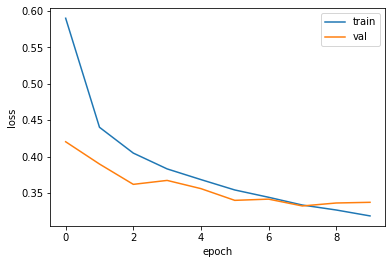

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [43]:
earlystopping_cb.stopped_epoch

9

In [44]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3320 - accuracy: 0.8779


[0.3320218324661255, 0.877916693687439]